<a href="https://colab.research.google.com/github/minhhoang258/LeDinhHoangMinh20104043/blob/main/B%C3%A0i%20t%E1%BA%ADp%20nh%E1%BA%ADn%20di%E1%BB%87n%20khu%C3%B4n%20m%E1%BA%B7t.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from sklearn.model_selection import train_test_split
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/content/drive')
train_data = ImageDataGenerator(rescale = 1./255, shear_range = 0.2 , zoom_range = 0.2, horizontal_flip = True) 
train=train_data.flow_from_directory('/content/drive/MyDrive/Nhandienkhuonmat/Train',target_size=(150,150), batch_size=32, class_mode='categorical')
test = train_data.flow_from_directory('/content/drive/MyDrive/Nhandienkhuonmat/Test',target_size=(150,150), batch_size=32, class_mode='categorical')
train.class_indices
test.class_indices

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/BT/Face/'
/content
Found 135 images belonging to 3 classes.
Found 45 images belonging to 3 classes.


{'Minh': 0, 'Thanh': 1, 'Thinh': 2}

In [14]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))

model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_19 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                 

In [16]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train,epochs=15,batch_size=128,verbose=1, validation_data=test, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/15
5/5 [==============================] - 32s 7s/step - loss: 46.5740 - accuracy: 0.4889 - val_loss: 0.1269 - val_accuracy: 0.9778
Epoch 2/15
5/5 [==============================] - 32s 6s/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 3/15
5/5 [==============================] - 31s 6s/step - loss: 0.6129 - accuracy: 0.8519 - val_loss: 0.1912 - val_accuracy: 0.9333
Epoch 4/15
5/5 [==============================] - 31s 6s/step - loss: 0.0330 - accuracy: 1.0000 - val_loss: 0.0265 - val_accuracy: 1.0000
Epoch 5/15
5/5 [==============================] - 30s 7s/step - loss: 5.6621e-04 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 6/15
5/5 [==============================] - 30s 7s/step - loss: 1.2395e-04 - accuracy: 1.0000 - val_loss: 4.6398e-04 - val_accuracy: 1.0000
Epoch 7/15
5/5 [==============================] - 30s 6s/step - loss: 6.3314e-05 - accuracy: 1.0000 - val_loss: 6.3557e-04 - val_accuracy: 1.0000
Epoch 8/15
5/

In [18]:
test_lost,test_acc=model.evaluate(test)
print('Test accuracy:',test_acc)

2/2 [==============================] - 4s 483ms/step - loss: 5.0861e-05 - accuracy: 1.0000
Test accuracy: 1.0


In [19]:
model.save("Nhan_dien_khuon_mat.h5")

In [20]:
model_CNN=load_model('Nhan_dien_khuon_mat.h5')

1/1 [==============================] - 0s 59ms/step
Thanh


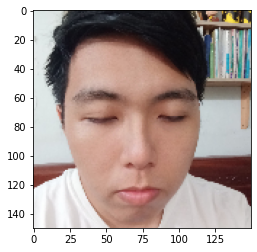

1/1 [==============================] - 0s 58ms/step
Thinh


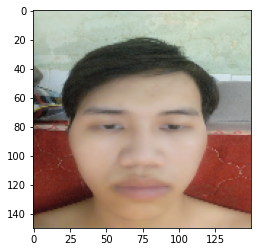

1/1 [==============================] - 0s 59ms/step
Minh


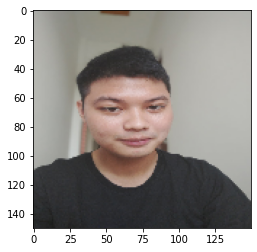

1/1 [==============================] - 0s 62ms/step
Minh


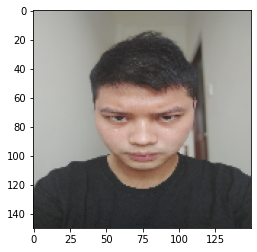

1/1 [==============================] - 0s 71ms/step
Thanh


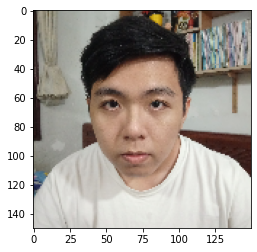

1/1 [==============================] - 0s 58ms/step
Thinh


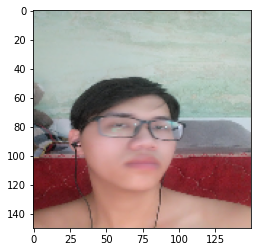

In [22]:
test="/content/drive/MyDrive/Nhandienkhuonmat/Attempt"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    pred='Minh'
  if round(result[0][1])==1:
    pred='Thanh'
  if round(result[0][2])==1:
    pred='Thinh'
  print(pred)
  plt.show()